Year Range: 1961 - 2024
Mean Temp Anomaly: 0.559
Hottest Year: 2024 2.003
Coldest Year: 1965 -0.244
Trend (°C per decade): 0.278
Top 5 Countries (2024): [(np.str_('Svalbard Jan Mayen Islands'), np.float64(3.689)), (np.str_('Ukraine'), np.float64(3.582)), (np.str_('"Belarus'), np.float64(3.55)), (np.str_('Bosnia and Herzegovina'), np.float64(3.436)), (np.str_('Montenegro'), np.float64(3.387))]


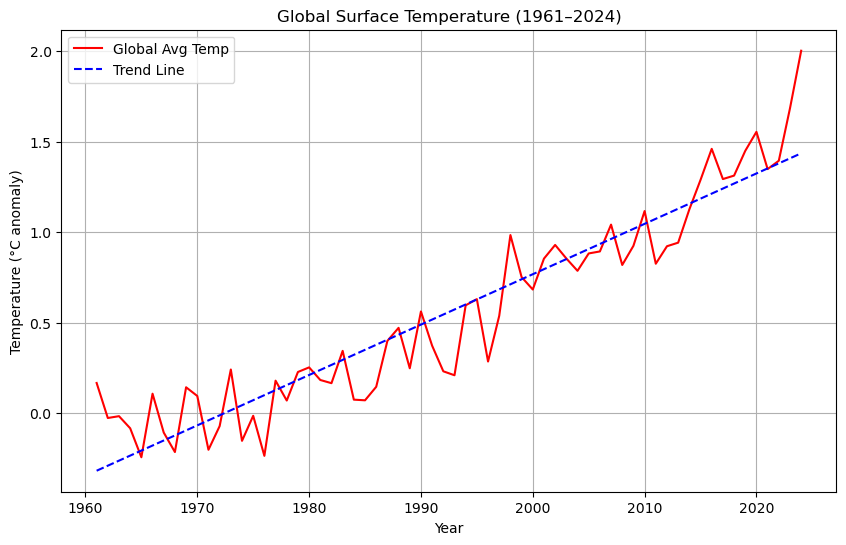

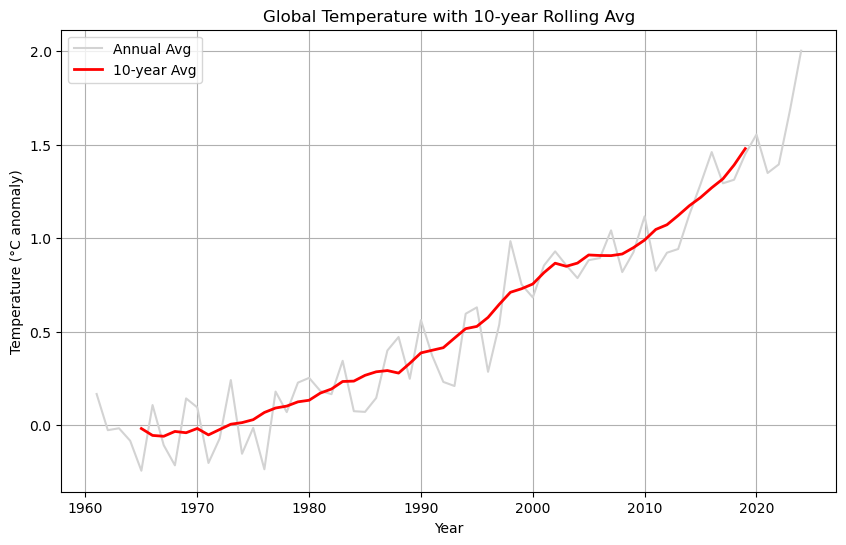

In [10]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Indicator_3_1_Climate_Indicators_Annual_Mean_Global_Surface_Temperature_577579683071085080.csv'

# Read file
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.read().splitlines()

data = [line.split(',') for line in lines]
header = data[0]
rows = data[1:]

# Years from column 10 onwards
years = np.array(header[10:], dtype=int)
expected_len = len(years)

# Extract countries and values
countries = []
values_list = []
for row in rows:
    countries.append(row[1])  # Country column
    # Take only last N columns equal to year count
    year_values = row[-expected_len:]
    numeric_values = []
    for val in year_values:
        try:
            numeric_values.append(float(val))
        except ValueError:
            numeric_values.append(np.nan)
    values_list.append(numeric_values)

values = np.array(values_list)


# Global average per year
global_avg = np.nanmean(values, axis=0)

# Trend line
coeffs = np.polyfit(years, global_avg, 1)
slope, intercept = coeffs
trend_line = intercept + slope * years

# Hottest and coldest years
hottest_year = years[np.argmax(global_avg)]
coldest_year = years[np.argmin(global_avg)]

# Top 5 countries for latest year (2024)
last_year_values = values[:, -1]
valid_mask = ~np.isnan(last_year_values)  # filter non-NaN
valid_values = last_year_values[valid_mask]
valid_countries = np.array(countries)[valid_mask]

top_indices = np.argsort(valid_values)[-5:][::-1]
top_5_countries = [(valid_countries[i], valid_values[i]) for i in top_indices]

# Rolling average (10 years)
window = 10
kernel = np.ones(window) / window
rolling_avg = np.convolve(global_avg, kernel, mode='valid')
rolling_years = years[(window-1)//2: -(window//2)]

# Print summary
print("Year Range:", years[0], "-", years[-1])
print("Mean Temp Anomaly:", round(global_avg.mean(), 3))
print("Hottest Year:", hottest_year, round(global_avg.max(), 3))
print("Coldest Year:", coldest_year, round(global_avg.min(), 3))
print("Trend (°C per decade):", round(slope * 10, 3))
print("Top 5 Countries (2024):", top_5_countries)

# Plot 1: Global trend
plt.figure(figsize=(10,6))
plt.plot(years, global_avg, label="Global Avg Temp", color='red')
plt.plot(years, trend_line, '--', color='blue', label="Trend Line")
plt.title("Global Surface Temperature (1961–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C anomaly)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Rolling average
plt.figure(figsize=(10,6))
plt.plot(years, global_avg, label="Annual Avg", color='lightgray')
plt.plot(rolling_years, rolling_avg, label=f"{window}-year Avg", color='red', linewidth=2)
plt.title("Global Temperature with 10-year Rolling Avg")
plt.xlabel("Year")
plt.ylabel("Temperature (°C anomaly)")
plt.legend()
plt.grid(True)
plt.show()


CO₂ Columns: ['\ufeffObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Date', 'Value']
Temperature years range: 1961 - 2024
CO₂ years range: 1958 - 2025
Common years count: 64
Correlation between Global Temp and CO₂: 0.959


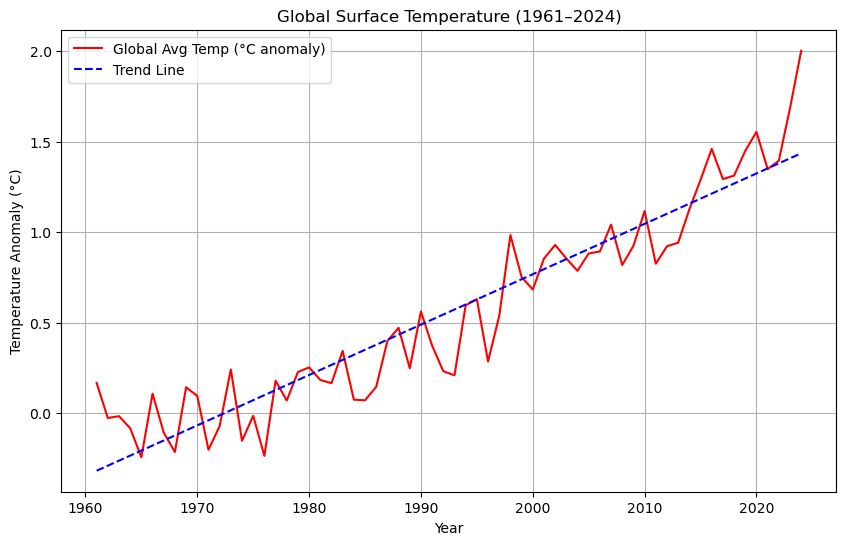

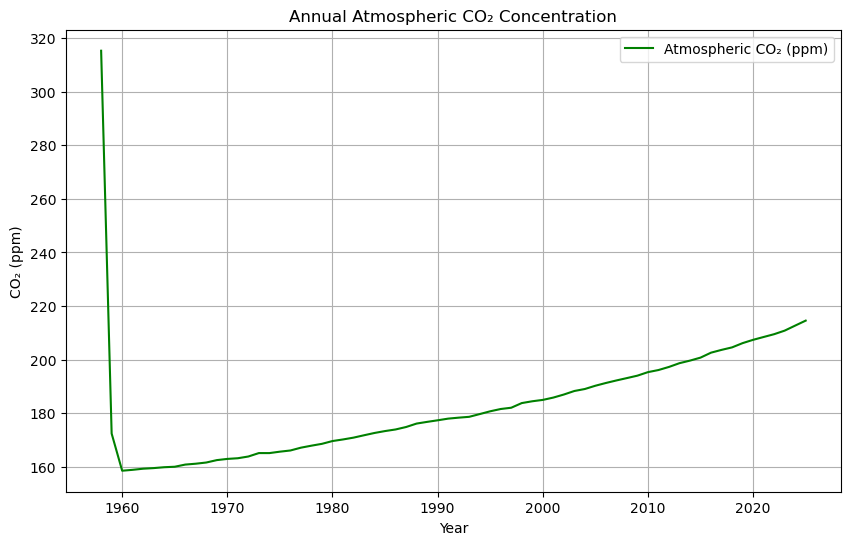

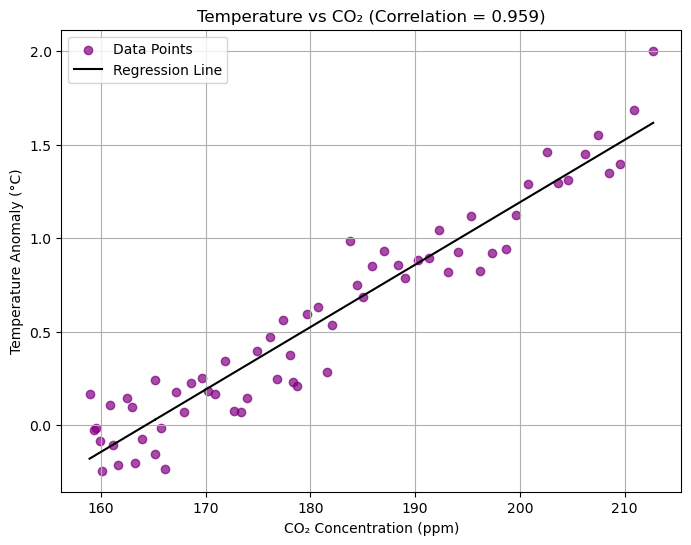

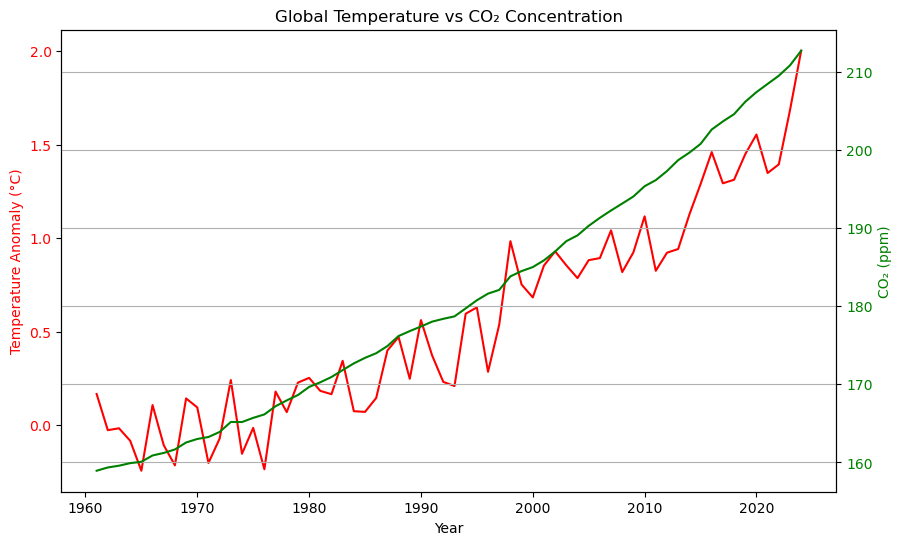

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# -------------------
# 1. Load Temperature Dataset
# -------------------
temp_file = 'Indicator_3_1_Climate_Indicators_Annual_Mean_Global_Surface_Temperature_577579683071085080.csv'

# Read temperature data safely using csv.reader
with open(temp_file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    temp_data = list(reader)

header = temp_data[0]
rows = temp_data[1:]

# Years from column 10 onwards
years = np.array(header[10:], dtype=int)
expected_len = len(years)

# Extract countries and values
values_list = []
for row in rows:
    year_values = row[-expected_len:]
    numeric_values = []
    for val in year_values:
        try:
            numeric_values.append(float(val))
        except ValueError:
            numeric_values.append(np.nan)
    values_list.append(numeric_values)

values = np.array(values_list)

# Compute global average per year
global_avg = np.nanmean(values, axis=0)

# Linear trend for temperature
coeffs = np.polyfit(years, global_avg, 1)
slope, intercept = coeffs
trend_line = intercept + slope * years

# -------------------
# 2. Load CO₂ Dataset
# -------------------
co2_file = 'Indicator_3_2_Climate_Indicators_Monthly_Atmospheric_Carbon_Dioxide_concentrations_-7117330003911643847.csv'

# Read CO₂ data safely using csv.reader
with open(co2_file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    co2_data = list(reader)

co2_header = co2_data[0]
co2_rows = co2_data[1:]

print("CO₂ Columns:", co2_header)

# Extract date and CO₂ values (handle YYYYMXX format)
dates = []
values_co2 = []
for row in co2_rows:
    try:
        date_str = row[10].strip()  # 'Date' column
        value = float(row[11].strip())  # 'Value' column
        year = int(date_str[:4])  # Extract first 4 chars as year
        dates.append(year)
        values_co2.append(value)
    except:
        continue

dates = np.array(dates)
values_co2 = np.array(values_co2)

# Compute annual average CO₂
unique_years = np.unique(dates)
annual_co2 = np.array([values_co2[dates == y].mean() for y in unique_years])

# -------------------
# 3. Correlation Analysis
# -------------------
print("Temperature years range:", years[0], "-", years[-1])
print("CO₂ years range:", unique_years[0], "-", unique_years[-1])

common_years = np.intersect1d(years, unique_years)
print("Common years count:", len(common_years))

if len(common_years) == 0:
    raise Exception("No overlapping years between temperature and CO₂ datasets. Check data.")

temp_mask = np.isin(years, common_years)
co2_mask = np.isin(unique_years, common_years)

temp_common = global_avg[temp_mask]
co2_common = annual_co2[co2_mask]

correlation = np.corrcoef(temp_common, co2_common)[0, 1]
print(f"Correlation between Global Temp and CO₂: {correlation:.3f}")

# -------------------
# 4. Plots
# -------------------

# (A) Global Temperature Trend
plt.figure(figsize=(10,6))
plt.plot(years, global_avg, label="Global Avg Temp (°C anomaly)", color='red')
plt.plot(years, trend_line, '--', color='blue', label="Trend Line")
plt.title("Global Surface Temperature (1961–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()

# (B) CO₂ Trend
plt.figure(figsize=(10,6))
plt.plot(unique_years, annual_co2, label="Atmospheric CO₂ (ppm)", color='green')
plt.title("Annual Atmospheric CO₂ Concentration")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.legend()
plt.grid(True)
plt.show()

# (C) Scatter Plot with Regression Line
coeffs_co2 = np.polyfit(co2_common, temp_common, 1)
line_fit = coeffs_co2[1] + coeffs_co2[0] * co2_common

plt.figure(figsize=(8,6))
plt.scatter(co2_common, temp_common, color='purple', alpha=0.7, label="Data Points")
plt.plot(co2_common, line_fit, color='black', label="Regression Line")
plt.title(f"Temperature vs CO₂ (Correlation = {correlation:.3f})")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()

# (D) Dual Axis Plot: Temp & CO₂ Over Years
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature Anomaly (°C)", color='red')
ax1.plot(common_years, temp_common, color='red', label="Global Temp")
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel("CO₂ (ppm)", color='green')
ax2.plot(common_years, co2_common, color='green', label="CO₂")
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Global Temperature vs CO₂ Concentration")
plt.grid(True)
plt.show()


Detected years: 1992 - 2022

Top 10 Countries by Latest Valid Data:
World: 4048942.37
Emerging and Developing Economies: 3086409.92
G20: 2815786.08
Russian Federation: 1637687.00
Americas: 1583942.06
Euro Area: 1017895.88
Advanced Economies: 962531.44
China, P.R.: Mainland: 938821.00
United States: 914742.00
Canada: 878870.00


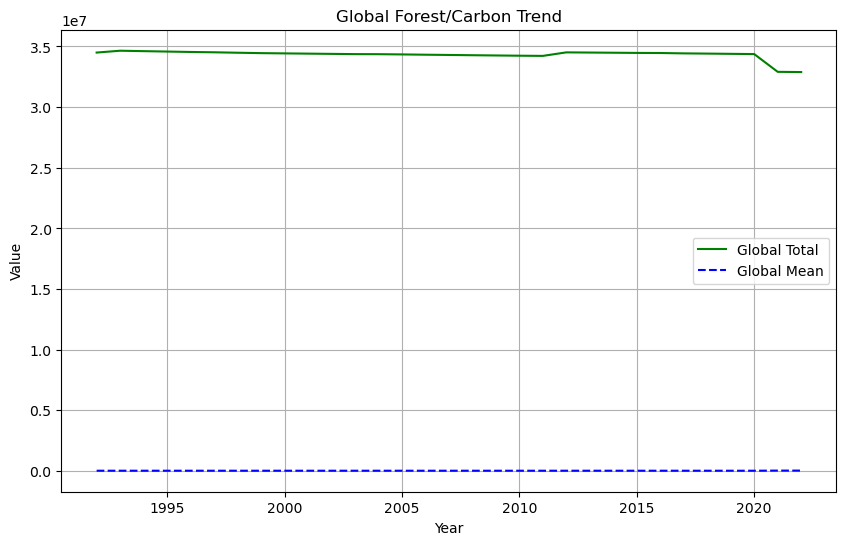

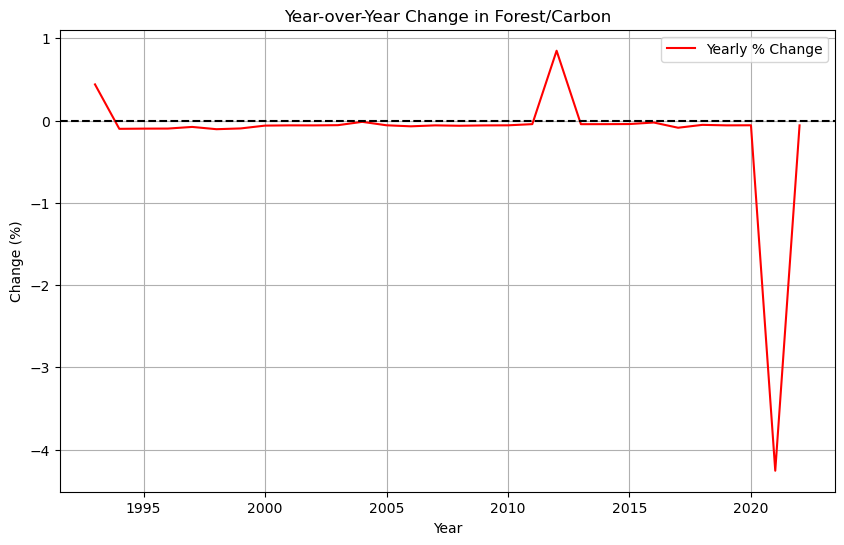

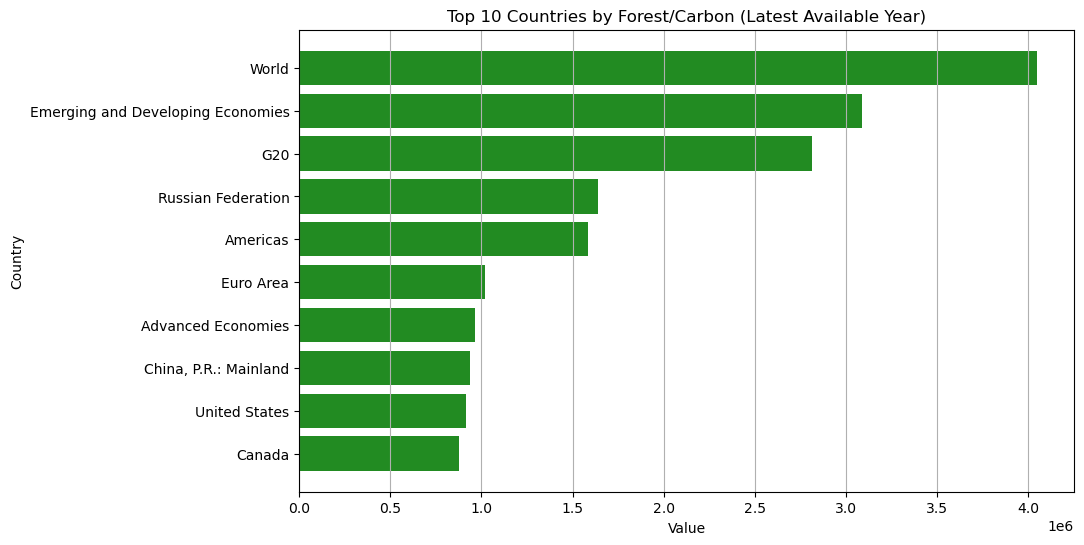

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import csv

file = 'Forest_and_Carbon.csv'

# Read CSV safely
with open(file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

header = data[0]
rows = data[1:]

# Find the start index of year columns
year_cols = [col for col in header if col.startswith('F')]
year_start_idx = header.index(year_cols[0])
years = np.array([int(c[1:]) for c in year_cols])  # Remove 'F' and convert to int
expected_len = len(years)

print(f"Detected years: {years[0]} - {years[-1]}")

# Extract countries and values
countries = []
values_list = []

for row in rows:
    country = row[1].strip()  # Country name
    year_values = row[year_start_idx:year_start_idx + expected_len]
    numeric_values = []
    for val in year_values:
        try:
            numeric_values.append(float(val))
        except:
            numeric_values.append(np.nan)
    countries.append(country)
    values_list.append(numeric_values)

values = np.array(values_list)  # Shape: (num_countries, num_years)

# Global trend (sum or mean)
global_trend = np.nansum(values, axis=0)  # Sum across countries
mean_trend = np.nanmean(values, axis=0)   # Mean across countries

# Yearly percentage change
pct_change = np.diff(global_trend) / global_trend[:-1] * 100

# -------------------
# FIX: Top 10 countries using latest valid value, not NaN
# -------------------
latest_valid_values = []
for row_vals in values:
    valid_vals = [v for v in row_vals if not np.isnan(v)]
    if valid_vals:
        latest_valid_values.append(valid_vals[-1])  # Last non-NaN value
    else:
        latest_valid_values.append(np.nan)

latest_valid_values = np.array(latest_valid_values)
valid_indices = ~np.isnan(latest_valid_values)

countries_filtered = np.array(countries)[valid_indices]
latest_values_filtered = latest_valid_values[valid_indices]

# Sort and pick top 10
top_indices = np.argsort(latest_values_filtered)[::-1][:10]
top_countries = [(countries_filtered[i], latest_values_filtered[i]) for i in top_indices]

print("\nTop 10 Countries by Latest Valid Data:")
for c, v in top_countries:
    print(f"{c}: {v:.2f}")

# -------------------
# Plots
# -------------------

# (A) Global Forest/Carbon Trend
plt.figure(figsize=(10,6))
plt.plot(years, global_trend, color='green', label="Global Total")
plt.plot(years, mean_trend, color='blue', linestyle='--', label="Global Mean")
plt.title("Global Forest/Carbon Trend")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# (B) Yearly Change (%)
plt.figure(figsize=(10,6))
plt.plot(years[1:], pct_change, color='red', label="Yearly % Change")
plt.axhline(0, color='black', linestyle='--')
plt.title("Year-over-Year Change in Forest/Carbon")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.legend()
plt.grid(True)
plt.show()

# (C) Top 10 Countries (Bar Chart)
countries_top = [c for c, _ in top_countries]
values_top = [v for _, v in top_countries]

plt.figure(figsize=(10,6))
plt.barh(countries_top[::-1], values_top[::-1], color='forestgreen')
plt.title("Top 10 Countries by Forest/Carbon (Latest Available Year)")
plt.xlabel("Value")
plt.ylabel("Country")
plt.grid(axis='x')
plt.show()


Detected years: 1992 - 2022

Top 10 Countries (Latest Year):
World: 8696568.10
Emerging and Developing Economies: 6223133.70
Americas: 3156750.29
World: 2803411.18
Advanced Economies: 2264591.22
Emerging and Developing Economies: 2235176.73
World: 1950787.53
Europe: 1737849.37
Latin America and the Caribbean: 1641688.95
Africa: 1612039.86

Key Metrics:
Year Range: 1992 - 2022
Global Average (Latest Year 2022): 21297.435
Trend Slope: 18.7484 (index units per year)
Year-over-Year Change (Last Year): 0.00%


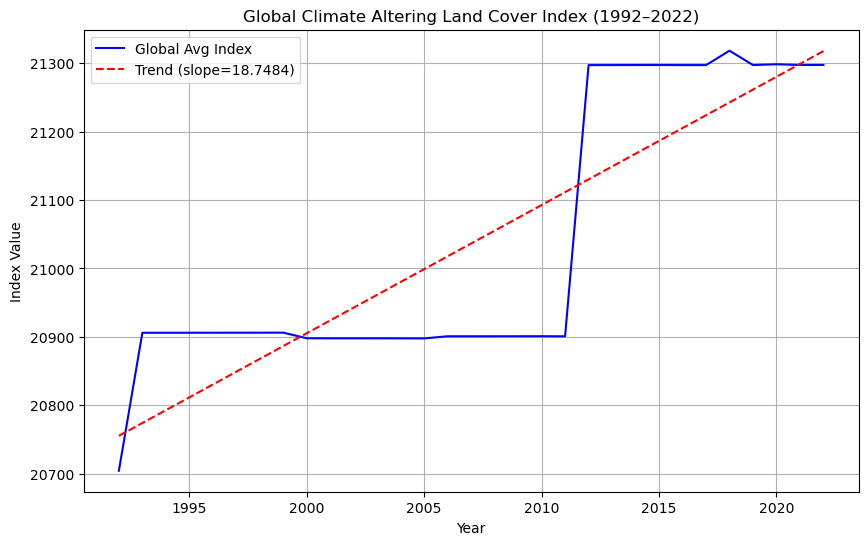

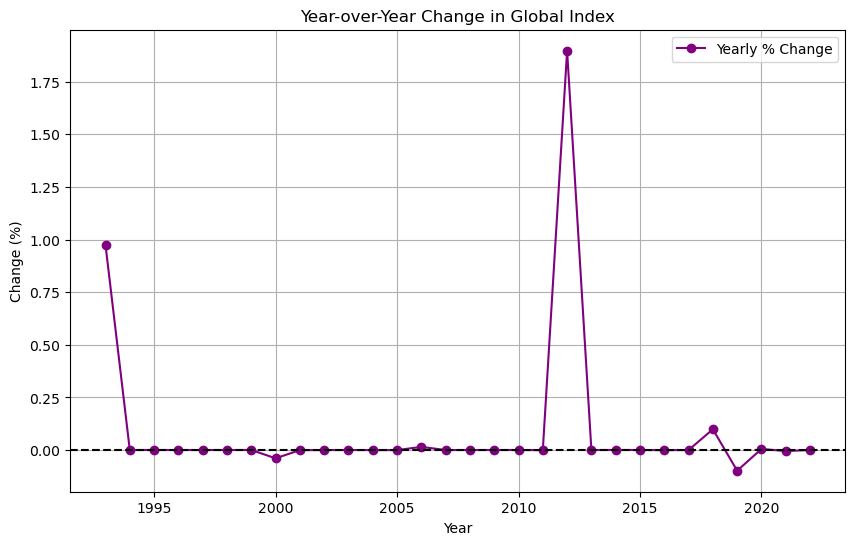

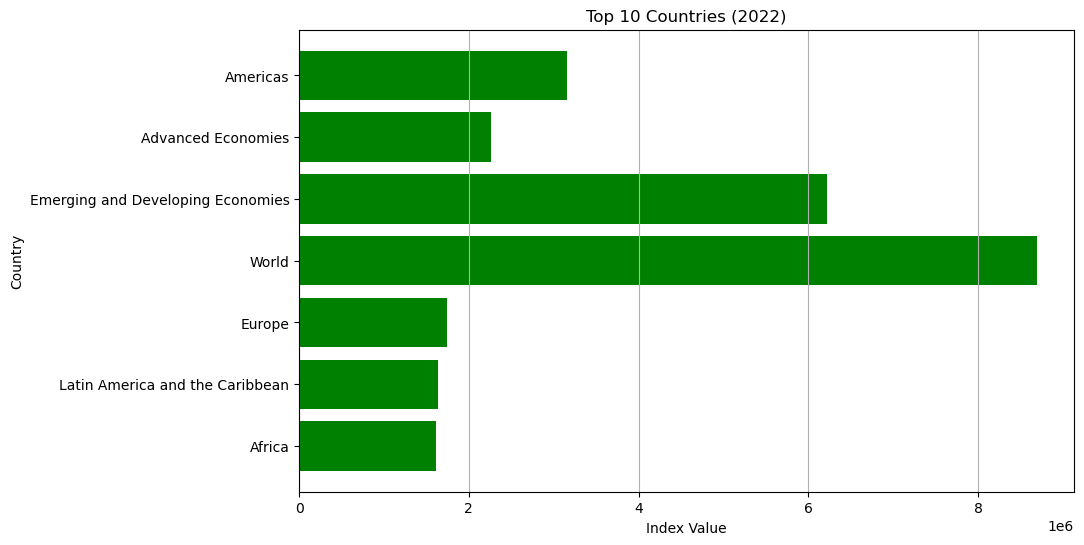

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# -------------------
# 1. Load Dataset
# -------------------
file = 'Land_Cover_Accounts.csv'

# Read CSV
with open(file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

header = data[0]
rows = data[1:]

# Detect year columns (start with 'F')
year_cols = [col for col in header if col.startswith('F')]
year_start_idx = header.index(year_cols[0])
years = np.array([int(c[1:]) for c in year_cols])  # Convert FYYYY -> YYYY
expected_len = len(years)

print(f"Detected years: {years[0]} - {years[-1]}")

# Extract countries and values
countries = []
values_list = []

for row in rows:
    country = row[1].strip()  # Country name
    year_values = row[year_start_idx:year_start_idx + expected_len]
    numeric_values = []
    for val in year_values:
        try:
            numeric_values.append(float(val))
        except:
            numeric_values.append(np.nan)
    countries.append(country)
    values_list.append(numeric_values)

values = np.array(values_list)  # Shape: (num_countries, num_years)

# -------------------
# 2. Global Trend Analysis
# -------------------
global_avg = np.nanmean(values, axis=0)  # Average per year
global_sum = np.nansum(values, axis=0)   # Sum per year

# Linear trend
coeffs = np.polyfit(years, global_avg, 1)
trend_line = coeffs[1] + coeffs[0] * years
trend_slope = coeffs[0]

# Yearly % change in global average
pct_change = np.diff(global_avg) / global_avg[:-1] * 100

# -------------------
# 3. Top 10 Countries (Latest Year)
# -------------------
latest_year_values = values[:, -1]
top_indices = np.argsort(latest_year_values)[::-1][:10]
top_countries = [(countries[i], latest_year_values[i]) for i in top_indices]

print("\nTop 10 Countries (Latest Year):")
for c, v in top_countries:
    print(f"{c}: {v:.2f}")

# -------------------
# 4. Print Key Metrics
# -------------------
print("\nKey Metrics:")
print(f"Year Range: {years[0]} - {years[-1]}")
print(f"Global Average (Latest Year {years[-1]}): {global_avg[-1]:.3f}")
print(f"Trend Slope: {trend_slope:.4f} (index units per year)")
print(f"Year-over-Year Change (Last Year): {pct_change[-1]:.2f}%")

# -------------------
# 5. Plots
# -------------------

# (A) Global Average Trend with Linear Fit
plt.figure(figsize=(10,6))
plt.plot(years, global_avg, color='blue', label="Global Avg Index")
plt.plot(years, trend_line, '--', color='red', label=f"Trend (slope={trend_slope:.4f})")
plt.title("Global Climate Altering Land Cover Index (1992–2022)")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.show()

# (B) Year-over-Year Percentage Change
plt.figure(figsize=(10,6))
plt.plot(years[1:], pct_change, color='purple', marker='o', label="Yearly % Change")
plt.axhline(0, color='black', linestyle='--')
plt.title("Year-over-Year Change in Global Index")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.legend()
plt.grid(True)
plt.show()

# (C) Top 10 Countries (Horizontal Bar Chart)
countries_top = [c for c, _ in top_countries]
values_top = [v for _, v in top_countries]

plt.figure(figsize=(10,6))
plt.barh(countries_top[::-1], values_top[::-1], color='green')
plt.title(f"Top 10 Countries ({years[-1]})")
plt.xlabel("Index Value")
plt.ylabel("Country")
plt.grid(axis='x')
plt.show()


Columns detected: ['\ufeffObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date', 'Value']
Total records: 41693

Top 10 Regions in 2025:
Baltic Sea: 233.99 mm
Indonesian: 187.30 mm
South China: 137.70 mm
Andaman Sea: 128.93 mm
Bay Bengal: 128.67 mm
Sea Okhotsk: 104.93 mm
Persian Gulf: 104.82 mm
North Sea: 103.68 mm
Arabian Sea: 88.75 mm
Southern Ocean: 76.05 mm

Key Metrics:
Year Range: 1992 - 2025
Average Rise (Latest Year 2025): 87.05 mm
Trend Slope: 3.2868 mm per year


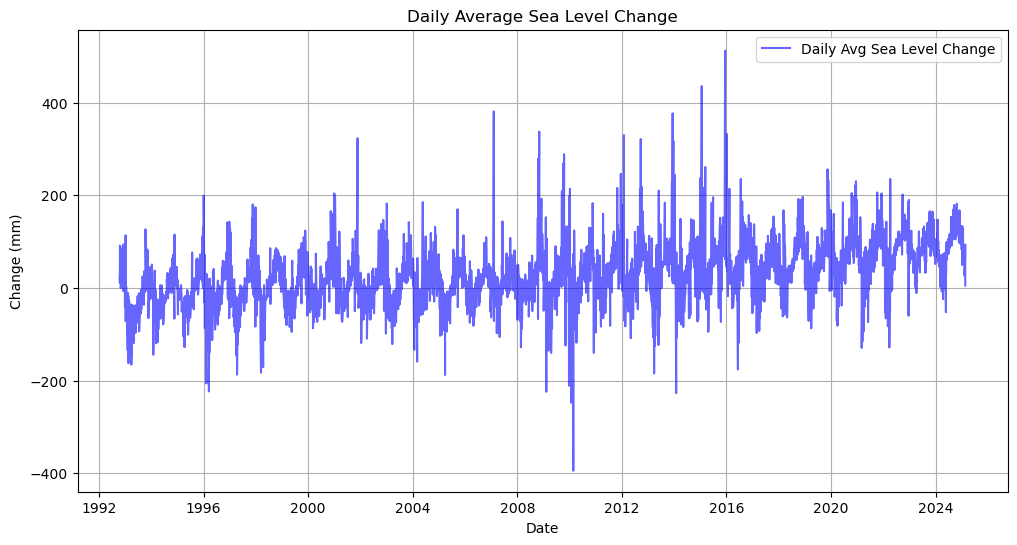

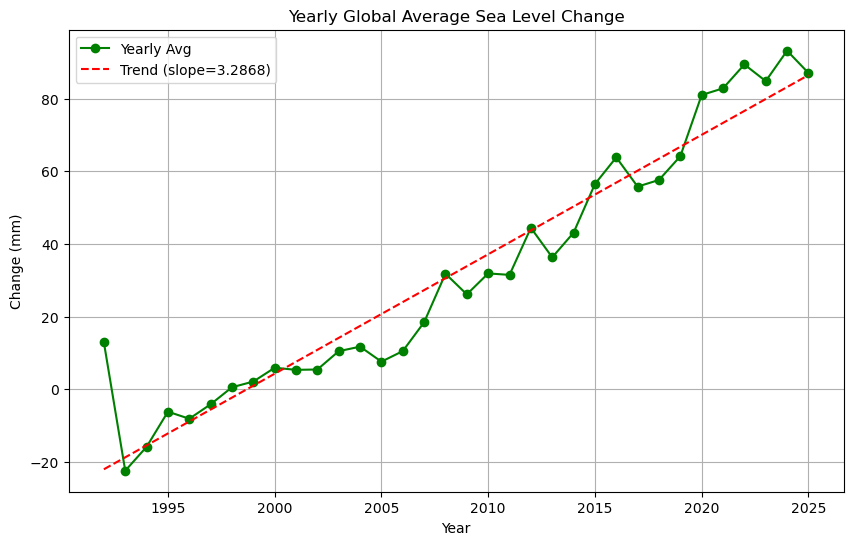

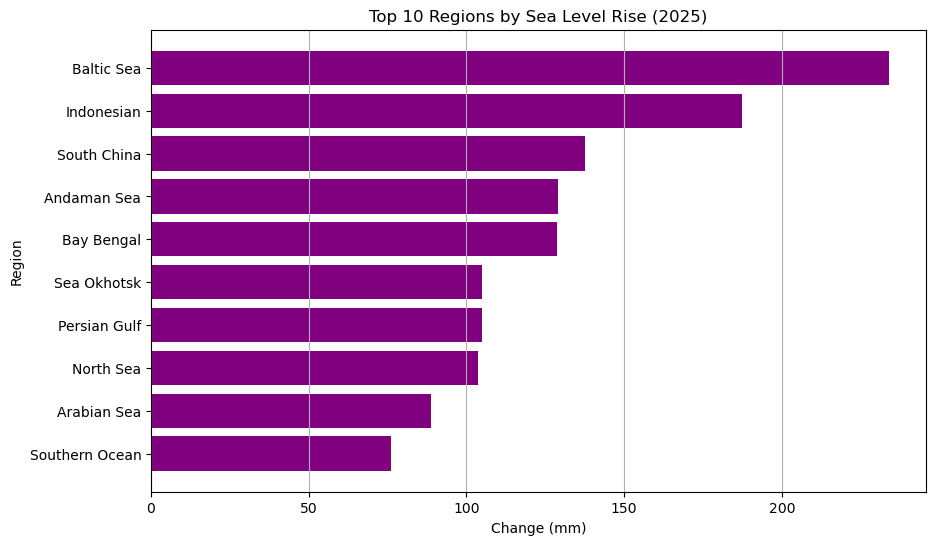

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime

# -------------------
# 1. Load Dataset
# -------------------
file = 'Indicator_3_3_melted_new_950412061812209490.csv'

# Read CSV
with open(file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

header = data[0]
rows = data[1:]

# Identify column indexes
measure_idx = header.index('Measure')  # Ocean/Sea region
date_idx = header.index('Date')
value_idx = header.index('Value')

print("Columns detected:", header)

# -------------------
# 2. Extract Data
# -------------------
dates = []
values = []
regions = []

for row in rows:
    try:
        date_str = row[date_idx].replace('D', '')  # Remove 'D'
        date_obj = datetime.strptime(date_str, "%m/%d/%Y")
        val = float(row[value_idx])
        region = row[measure_idx].strip()
        
        dates.append(date_obj)
        values.append(val)
        regions.append(region)
    except:
        continue

dates = np.array(dates)
values = np.array(values)
regions = np.array(regions)

print(f"Total records: {len(values)}")

# -------------------
# 3. Daily/Monthly Global Trend
# -------------------
# Sort by date
sorted_idx = np.argsort(dates)
dates = dates[sorted_idx]
values = values[sorted_idx]
regions = regions[sorted_idx]

# Compute global average per unique date
unique_dates = np.unique(dates)
daily_avg = []
for d in unique_dates:
    daily_avg.append(np.mean(values[dates == d]))
daily_avg = np.array(daily_avg)

# -------------------
# 4. Yearly Aggregation
# -------------------
years = np.array([d.year for d in dates])
unique_years = np.unique(years)
yearly_avg = np.array([np.mean(values[years == y]) for y in unique_years])

# Linear trend for yearly data
coeffs = np.polyfit(unique_years, yearly_avg, 1)
trend_line = coeffs[1] + coeffs[0] * unique_years
trend_slope = coeffs[0]

# -------------------
# 5. Top Regions (Latest Year)
# -------------------
latest_year = unique_years[-1]
mask_latest = years == latest_year
region_values_latest = {}

for r, v in zip(regions[mask_latest], values[mask_latest]):
    if r not in region_values_latest:
        region_values_latest[r] = []
    region_values_latest[r].append(v)

# Compute mean for each region in the latest year
region_means_latest = {r: np.mean(vs) for r, vs in region_values_latest.items()}
top_regions = sorted(region_means_latest.items(), key=lambda x: x[1], reverse=True)[:10]

print(f"\nTop 10 Regions in {latest_year}:")
for r, v in top_regions:
    print(f"{r}: {v:.2f} mm")

# -------------------
# 6. Print Key Metrics
# -------------------
print("\nKey Metrics:")
print(f"Year Range: {unique_years[0]} - {unique_years[-1]}")
print(f"Average Rise (Latest Year {latest_year}): {yearly_avg[-1]:.2f} mm")
print(f"Trend Slope: {trend_slope:.4f} mm per year")

# -------------------
# 7. Plots
# -------------------

# (A) Daily Trend (Raw Data)
plt.figure(figsize=(12,6))
plt.plot(unique_dates, daily_avg, color='blue', alpha=0.6, label="Daily Avg Sea Level Change")
plt.title("Daily Average Sea Level Change")
plt.xlabel("Date")
plt.ylabel("Change (mm)")
plt.grid(True)
plt.legend()
plt.show()

# (B) Yearly Trend with Linear Fit
plt.figure(figsize=(10,6))
plt.plot(unique_years, yearly_avg, marker='o', color='green', label="Yearly Avg")
plt.plot(unique_years, trend_line, '--', color='red', label=f"Trend (slope={trend_slope:.4f})")
plt.title("Yearly Global Average Sea Level Change")
plt.xlabel("Year")
plt.ylabel("Change (mm)")
plt.legend()
plt.grid(True)
plt.show()

# (C) Top 10 Regions (Bar Chart)
regions_top = [r for r, _ in top_regions]
values_top = [v for _, v in top_regions]

plt.figure(figsize=(10,6))
plt.barh(regions_top[::-1], values_top[::-1], color='purple')
plt.title(f"Top 10 Regions by Sea Level Rise ({latest_year})")
plt.xlabel("Change (mm)")
plt.ylabel("Region")
plt.grid(axis='x')
plt.show()


Detected years: 1980 - 2024

Top 10 Countries (Latest Year):
Bangladesh: 49448944 disasters
Bangladesh: 33000000 disasters
Philippines: 28188497 disasters
Philippines: 23941101 disasters
India: 18830036 disasters
India: 12807193 disasters
Bangladesh: 11858931 disasters
Zambia: 9800000 disasters
Zambia: 9800000 disasters
Zimbabwe: 7600000 disasters

Key Metrics:
Year Range: 1980 - 2024
Total Disasters (Latest Year): 331412050
Trend Slope: 1306778.02 disasters per year


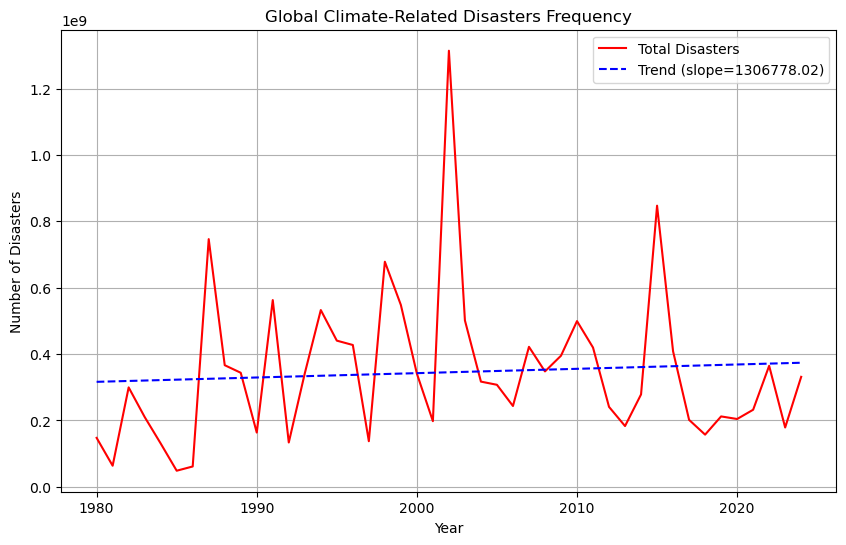

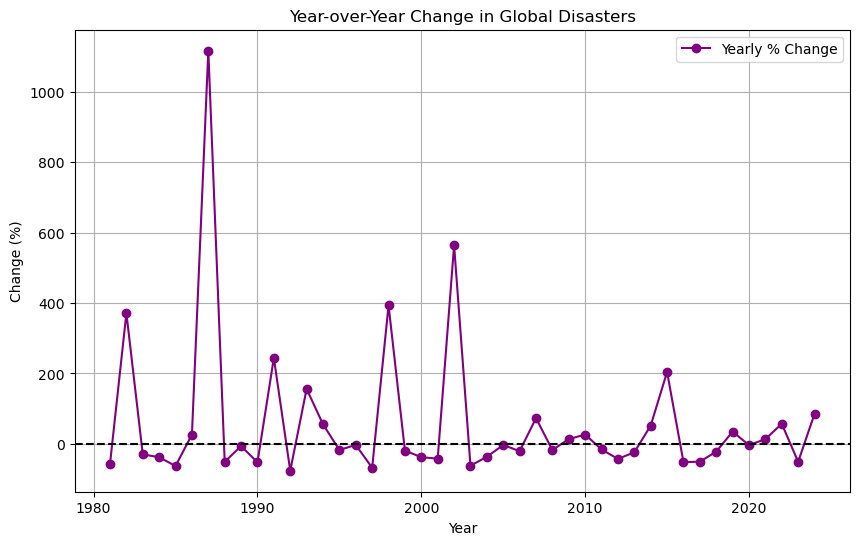

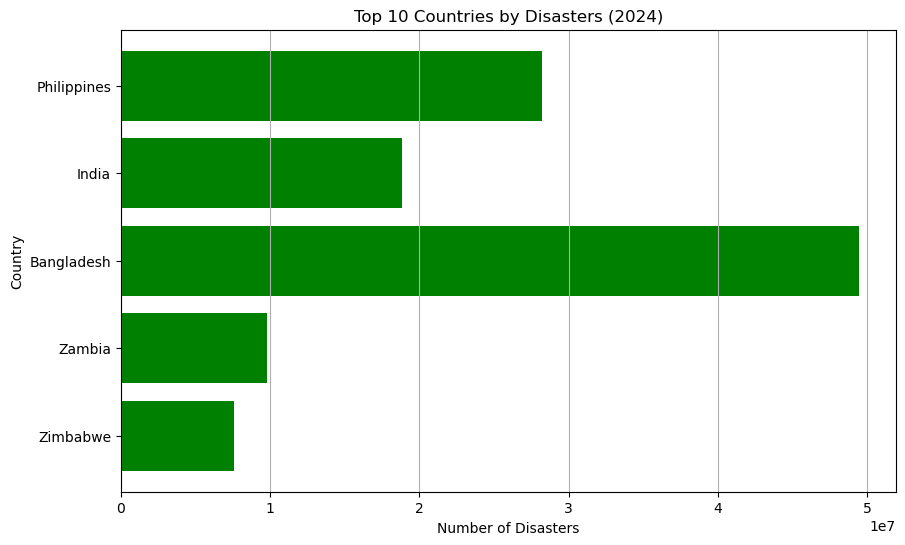

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# -------------------
# 1. Load Dataset
# -------------------
file = 'Indicator_11_1_Physical_Risks_Climate_related_disasters_frequency_7212563912390016675.csv'

# Read CSV
with open(file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

header = data[0]
rows = data[1:]

# Identify year columns (likely start after 10th column)
year_cols = [col for col in header if col.strip().isdigit() or col.startswith('F')]
year_start_idx = header.index(year_cols[0])
years = np.array([int(c.replace('F', '')) for c in year_cols])
expected_len = len(years)

print(f"Detected years: {years[0]} - {years[-1]}")

# -------------------
# 2. Extract Data
# -------------------
countries = []
values_list = []

for row in rows:
    country = row[1].strip()
    year_values = row[year_start_idx:year_start_idx + expected_len]
    numeric_values = []
    for val in year_values:
        try:
            numeric_values.append(float(val))
        except:
            numeric_values.append(np.nan)
    countries.append(country)
    values_list.append(numeric_values)

values = np.array(values_list)  # Shape: (num_countries, num_years)

# -------------------
# 3. Global Trend
# -------------------
global_sum = np.nansum(values, axis=0)  # Total disasters per year
global_mean = np.nanmean(values, axis=0)

# Linear trend for global_sum
coeffs = np.polyfit(years, global_sum, 1)
trend_line = coeffs[1] + coeffs[0] * years
trend_slope = coeffs[0]

# Year-over-year % change
pct_change = np.diff(global_sum) / global_sum[:-1] * 100

# -------------------
# 4. Top 10 Countries (Latest Year)
# -------------------
# Find the last year with valid data for most countries
for idx in range(values.shape[1]-1, -1, -1):
    if np.count_nonzero(~np.isnan(values[:, idx])) > 5:  # At least 5 countries with data
        latest_year_idx = idx
        break

latest_year_values = values[:, latest_year_idx]
latest_year = years[latest_year_idx]
# Filter out NaN and zero values
valid_indices = np.where(~np.isnan(latest_year_values) & (latest_year_values > 0))[0]
sorted_indices = valid_indices[np.argsort(latest_year_values[valid_indices])[::-1]]
top_indices = sorted_indices[:10]

top_countries = [(countries[i], latest_year_values[i]) for i in top_indices]
top_countries.sort(key=lambda x: x[1], reverse=True)
print("\nTop 10 Countries (Latest Year):")
for c, v in top_countries:
    print(f"{c}: {v:.0f} disasters")

# -------------------
# 5. Key Metrics
# -------------------
print("\nKey Metrics:")
print(f"Year Range: {years[0]} - {years[-1]}")
print(f"Total Disasters (Latest Year): {global_sum[-1]:.0f}")
print(f"Trend Slope: {trend_slope:.2f} disasters per year")

# -------------------
# 6. Visualizations
# -------------------

# (A) Global Disaster Frequency Trend
plt.figure(figsize=(10,6))
plt.plot(years, global_sum, color='red', label="Total Disasters")
plt.plot(years, trend_line, '--', color='blue', label=f"Trend (slope={trend_slope:.2f})")
plt.title("Global Climate-Related Disasters Frequency")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.legend()
plt.grid(True)
plt.show()

# (B) Year-over-Year Change (%)
plt.figure(figsize=(10,6))
plt.plot(years[1:], pct_change, marker='o', color='purple', label="Yearly % Change")
plt.axhline(0, color='black', linestyle='--')
plt.title("Year-over-Year Change in Global Disasters")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.legend()
plt.grid(True)
plt.show()

# (C) Top 10 Countries (Horizontal Bar Chart)
countries_top = [c for c, _ in top_countries]
values_top = [v for _, v in top_countries]

plt.figure(figsize=(10,6))
plt.barh(countries_top[::-1], values_top[::-1], color='green')
plt.title(f"Top 10 Countries by Disasters ({latest_year})")
plt.xlabel("Number of Disasters")
plt.ylabel("Country")
plt.grid(axis='x')
plt.show()
